# 1. Bessel Functions

These appear in various physics problems, and are given by:
$$J_m(x) = \frac{1}{\pi} \int_0^\pi \cos(m \theta - x \sin \theta) d\theta $$
where $m$ is a whole number and $x$ is a non-negative real number.

## Part (a) 

Write pseudocode for your own Python function that calculates the value of the Bessel function
$J_m(x)$, taking $m$ and $x$ as inputs, using Gaussian Quadrature with $N$ points. $N$ is a parameter that you set in your code. You can use the gaussxw and gaussxwab functions from the previous lab exercises.

In [6]:
from pylab import *
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

## Part (b)
Now write the actual code.

In [9]:
import numpy as np

def bessel_function(m, N, x):
    a = 0
    b = np.pi
    theta, w = gaussxwab(N, a, b)
    
    integral_sum = 0
    
    for i in range(N):
        integrand = cos(m * theta[i] - x * sin(theta[i]))
        integral_sum += w[i] * integrand
    
    return (1 / np.pi) * integral_sum

## Part (c)
Use the code from the previous part  to make a plot, on a single graph, of the Bessel
functions $J_0, J_1, J_2$ as a function of $x$ from $x = 0$ to $x = 20$.

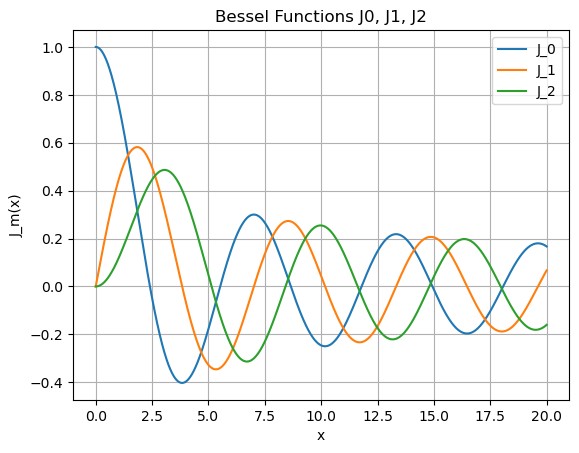

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.linspace(0, 20, 1000)
m_vals = [0, 1, 2]
N = 100

plt.figure()
plt.grid()
for m in m_vals:
    y_vals = []  # To store the Bessel function values for each m
    for x in x_axis:
        y = bessel_function(m, N, x)
        y_vals.append(y)
    
    plt.plot(x_axis, y_vals, label=f'J_{m}')

plt.title('Bessel Functions J0, J1, J2')
plt.xlabel('x')
plt.ylabel('J_m(x)')

plt.legend()

## Part (d)
scipy.special includes some special functions that are a little too exotic to be part of NumPy. One of such special function is the Bessel function, called jv . Compare graphically the difference between the results of your Bessel function from the previous part, and the results of the SciPy version.

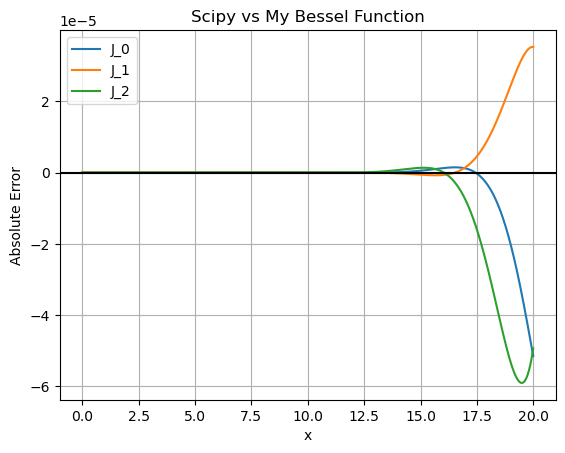

In [42]:
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.linspace(0, 20, 1000)
m_vals = [0, 1, 2]
N = 20

plt.figure()

for m in m_vals:
    y_vals = []  # To store the Bessel function values for each m
    for x in x_axis:
        y = bessel_function(m, N, x) - jv(m, x) # Now using scipy function
        y_vals.append(y)
    
    plt.plot(x_axis, y_vals, label=f'J_{m}')

plt.title('Scipy vs My Bessel Function')
plt.grid()
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.axhline(0., color='k')
plt.legend()


# 2. Black Body Radiation

The black body function can be written as a function of wavenumber $\nu$ and temperature $T$, using the Planck constant $h$, the speed of light $c$ and the Boltzmann constant $k$:
$$B = \frac{2h\nu^3}{c^2(\exp{\frac{h\nu}{kT}}-1)}$$
The total energy per unit area emitted by a black body is then:
$$W = \pi\int_0^\infty B d\nu $$
It follows Stefan's law:
$W = \sigma T^4$,
where $\sigma$ is the Stefan-Boltzmann constant. Therefore
$$\sigma = \frac{\pi\int_0^\infty B d\nu}{T^4} $$
(Of course, you remember all this if I was your prof for PHY252.)

Equivalently, using the change of variables $x = \frac{h \nu}{kT}$:
$$\sigma = C_1 \int_0^\infty\frac{x^3}{e^x-1} dx$$
with $C_1 = \frac{2 \pi k^4}{c^2 h^3}$

We can convert the limits of integration to [0,1] by another variable transform
$ z = \frac{x}{1+x}$:
$$\int_0^\infty f(x)dx = \int_0^1 \frac{1}{(1-z)^2}f\left(\frac{z}{1-z}\right)dz = \int_0^1 g(z) dz$$
We want to perform a numerical integral over the domain [0,1] in order to calculate $\sigma$. 

## Part (a)
Write code for the functions x(z), f(x), and g(z). 

In [32]:
import numpy as np

def x(z):
    return z / (1 - z)

def f(x):
    return x**3 / (np.exp(x)-1)
    
def g(z):
    return f(x(z)) * 1. / (1 - z)**2

## Part (b)
Incorporating your functions from the previous part, write code to calculate $$\int_0^\infty\frac{x^3}{e^x-1} dx$$ using Gaussian quadrature. Figure out for yourself what value of $N$ you need, to obtain an accuracy of about 5 digits.

In [34]:
N = 25
x_vals, w = gaussxwab(N, 0.0, 1.0)

# Compute the integral using Gaussian quadrature
integral = 0
for i in range(N):
    integral += w[i] * g(x_vals[i])

print(f"Integral result: {integral}")

Integral result: 6.493873552025643


## Part (c)
Using the code from the previous part, calculate a value for the Stefan-Boltzmann constant in SI units, to three significant figures or more. Compare it to the value from NIST that is included in the scipy.constants package (https://docs.scipy.org/doc/scipy/reference/constants.html)

In [39]:
from scipy.constants import Stefan_Boltzmann, speed_of_light, pi, hbar, Boltzmann

C_1 = Boltzmann**4 / (4*pi**2 * speed_of_light**2 * hbar**3)
sigma_calculated = C_1 * integral

print(f"Calculated Stefan-Boltzmann constant: {sigma_calculated}")
print(f"Stefan-Boltzmann constant from scipy.constants: {Stefan_Boltzmann}")

# Percentage error
percentage_error = abs((sigma_calculated - Stefan_Boltzmann) / Stefan_Boltzmann) * 100
print(f"Percentage error: {percentage_error:.6f}%")

Calculated Stefan-Boltzmann constant: 5.670316920107215e-08
Stefan-Boltzmann constant from scipy.constants: 5.670374419e-08
Percentage error: 0.001014%


Note, the Scipy value is taken from the NIST database, and includes an uncertainty in the measurement, so it is the currently accepted value. Our integral doesn't need to be machine precision level because the actual constant is only known to 8 digits.

# Fun with interpolation

Here, I perform interpolation for the function $$y = \frac{1}{2+x^2}$$

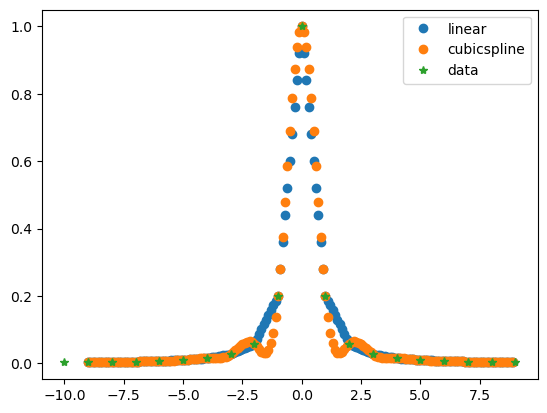

In [41]:
from scipy.interpolate import CubicSpline, interp1d
import matplotlib.pyplot as pltm

# fake data to interpolate from
x = np.arange(-10,10)
# y = 1./(2.+x**2)
y = 1./(1.+(2*x)**2)

# points at which we want to interpolate
xs = np.arange(-9, 9, 0.1)

# Apply Linear interpolation
linear_int = interp1d(x,y)
ys_lin = linear_int(xs)

# apply cubic spline
cs = CubicSpline(x, y)
ys_cub = cs(xs)
  
# plot linear interpolation
pltm.plot(xs, ys_lin, 'o', label='linear')
pltm.plot(xs, ys_cub, 'o', label='cubicspline')
pltm.plot(x, y, '*', label='data')
pltm.legend()
pltm.show()

## Exercise 6

Replace the definition of y in the code above, to interpolate the following function:
$$y = \frac{1}{1+(2x)^2}$$

Show the plot. Is the cubic spline still nicer than the linear interpolation?